In [2]:
from pathlib import Path
RAW = Path("/Users/liruiling/Desktop/COCHA/raw")
RAW.exists(), list(RAW.glob("*.pkl"))[:3]

(True,
 [PosixPath('/Users/liruiling/Desktop/COCHA/raw/1950-vocab.pkl'),
  PosixPath('/Users/liruiling/Desktop/COCHA/raw/1980-vocab.pkl'),
  PosixPath('/Users/liruiling/Desktop/COCHA/raw/1900-vocab.pkl')])

In [5]:
import os, glob
print("cwd =", os.getcwd())
print("here files =", sorted(os.listdir("."))[:30])

cwd = /Users/liruiling/Desktop/COCHA_PROJECT/notebooks
here files = ['setup.ipynb']


In [43]:
import pandas as pd
df = pd.read_csv("/Users/liruiling/Desktop/COCHA_PROJECT/results/tech_trends_layerA.csv")
df["decade"] = df["decade"].astype(int)

for c in ["ai","social_media", "smartphone"]:
    print("\n", c)
    print(df[df["concept"]==c][["decade","concept_hits"]].sort_values("decade").to_string(index=False))


 ai
 decade  concept_hits
   1900             1
   1910             1
   1920             2
   1930             2
   1940             2
   1950             2
   1960             2
   1970             2
   1980             2
   1990            11
   2000            11
   2010            14

 social_media
 decade  concept_hits
   1900             0
   1910             1
   1920             2
   1930             2
   1940             2
   1950             2
   1960             3
   1970             3
   1980             3
   1990             4
   2000             9
   2010            12

 smartphone
 decade  concept_hits
   1900             3
   1910             3
   1920             3
   1930             3
   1940             3
   1950             3
   1960             3
   1970             4
   1980             4
   1990             7
   2000            10
   2010            11


/var/folders/ch/ym6jyzdj6sjcwcddhqr075hm0000gn/T/ipykernel_60486/4292135779.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(concepts))


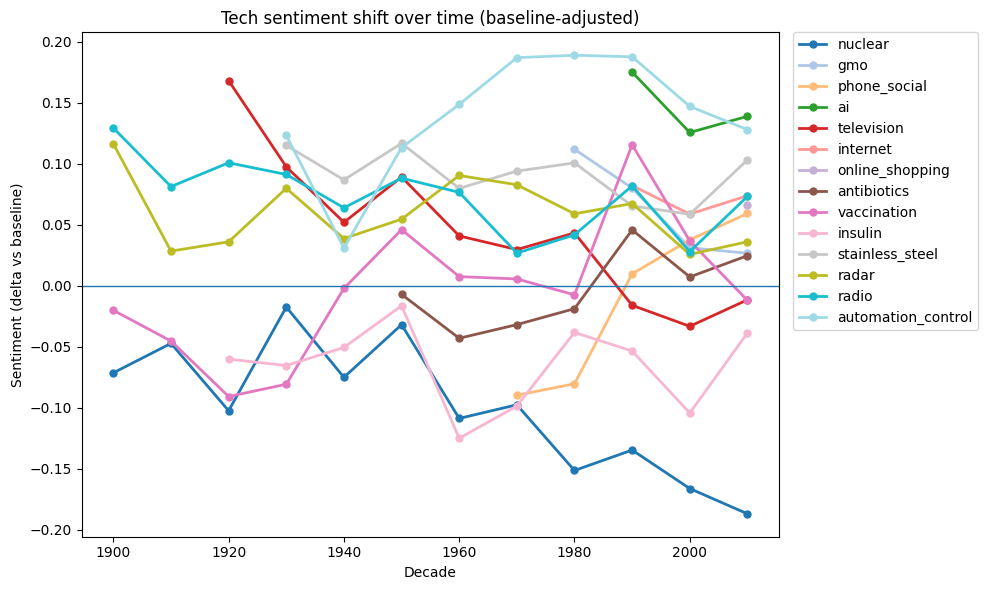

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

df = pd.read_csv("/Users/liruiling/Desktop/COCHA_PROJECT/results/tech_trends_layerA.csv")
df["decade"] = df["decade"].astype(int)

concepts = [
    'nuclear', 'gmo', 'phone_social', 'ai', 'television', 'internet',
    'online_shopping', 'antibiotics', 'vaccination', 'insulin',
    'stainless_steel', 'radar', 'radio', 'automation_control'
]
sub = df[df["concept"].isin(concepts)].copy()

# 20个离散色，足够覆盖你这14条线且不重复
cmap = plt.cm.get_cmap("tab20", len(concepts))

plt.figure(figsize=(10, 6))
for i, c in enumerate(concepts):
    tmp = sub[sub["concept"] == c].sort_values("decade")
    plt.plot(
        tmp["decade"],
        tmp["sentiment_delta"],
        marker="o",
        label=c,
        color=cmap(i),
        linewidth=2,
        markersize=5,
    )

plt.axhline(0, linewidth=1)
plt.xlabel("Decade")
plt.ylabel("Sentiment (delta vs baseline)")
plt.title("Tech sentiment shift over time (baseline-adjusted)")

# legend 放到图外，避免遮挡
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

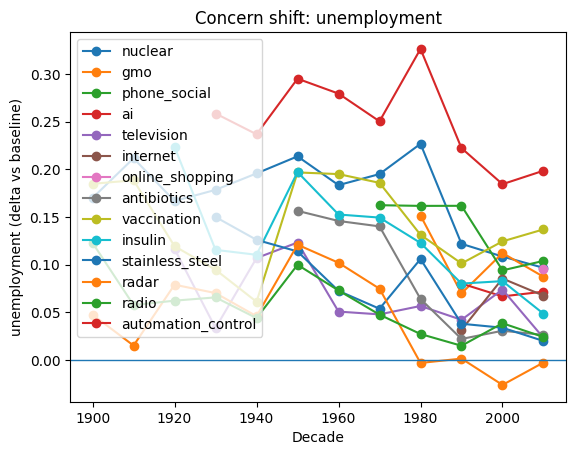

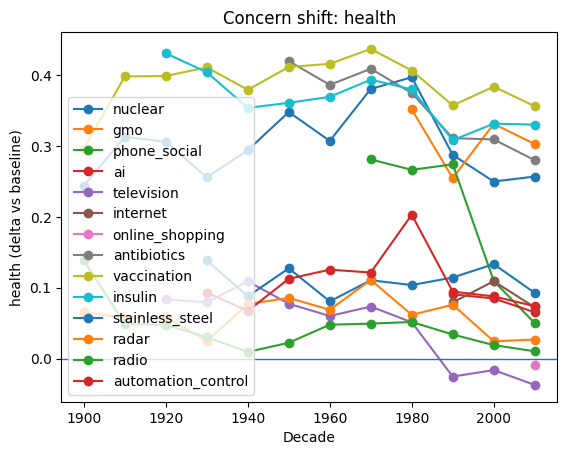

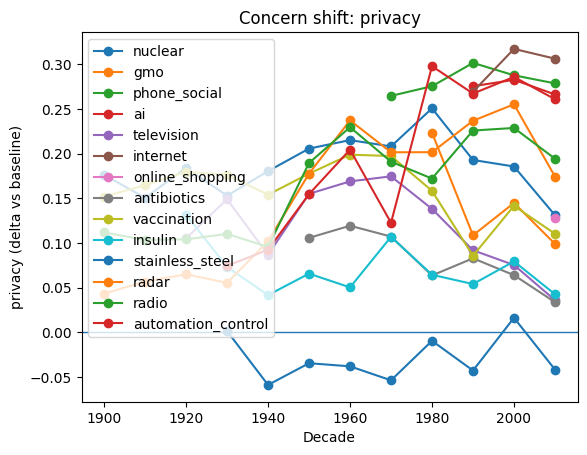

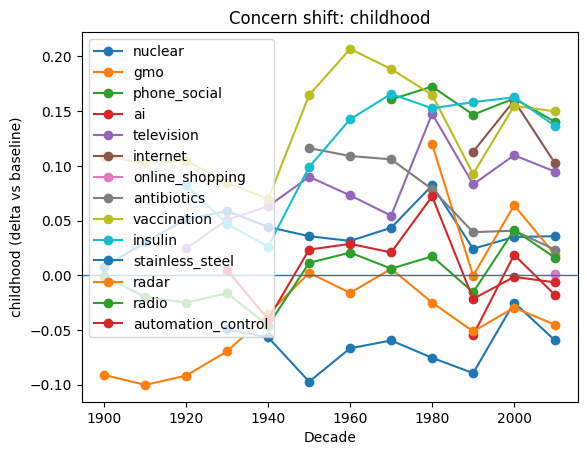

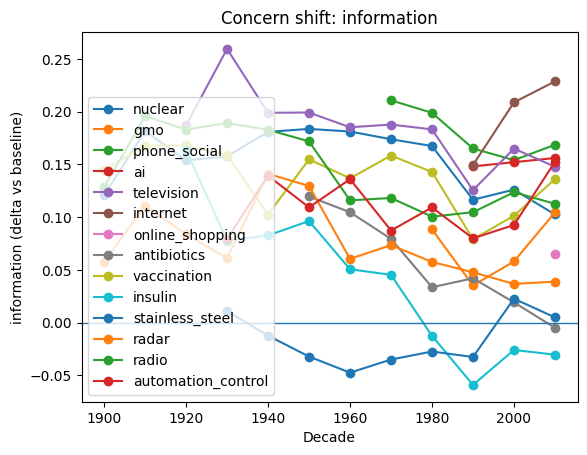

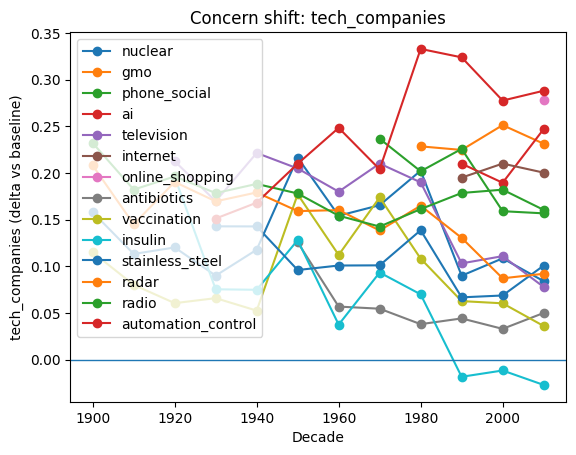

In [46]:
concerns = ["unemployment", "health", "privacy", "childhood", "information", "tech_companies"]

for k in concerns:
    plt.figure()
    for c in concepts:
        tmp = sub[sub["concept"] == c].sort_values("decade")
        plt.plot(tmp["decade"], tmp[f"{k}_delta"], marker="o", label=c)
    plt.axhline(0, linewidth=1)
    plt.xlabel("Decade")
    plt.ylabel(f"{k} (delta vs baseline)")
    plt.title(f"Concern shift: {k}")
    plt.legend()
    plt.show()

In [8]:
import pickle
import numpy as np
from pathlib import Path

RAW = Path("/Users/liruiling/Desktop/COCHA/raw")

def load_vocab(decade: str):
    p = RAW / f"{decade}-vocab.pkl"
    with open(p, "rb") as f:
        v = pickle.load(f)
    if isinstance(v, dict):
        tokens = list(v.keys())
        kind = "dict(word->idx)"
    elif isinstance(v, (list, tuple)):
        tokens = list(v)
        kind = f"{type(v).__name__}[str]"
    else:
        tokens = None
        kind = str(type(v))
    return kind, tokens

# 选一个早期、一个晚期 decade 看看
for decade in ["1900", "2000", "2010"]:
    kind, tokens = load_vocab(decade)
    print(f"\n== {decade} ==")
    print("vocab type:", kind)
    print("n_tokens:", len(tokens) if tokens is not None else None)
    # 是否有短语/复合token
    has_space = any(" " in t for t in tokens)
    has_us = any("_" in t for t in tokens)
    print("contains space tokens:", has_space)
    print("contains underscore tokens:", has_us)
    # 给一些例子
    if has_space:
        print("examples with space:", [t for t in tokens if " " in t][:20])
    if has_us:
        print("examples with underscore:", [t for t in tokens if "_" in t][:20])


== 1900 ==
vocab type: list[str]
n_tokens: 28400
contains space tokens: False
contains underscore tokens: False

== 2000 ==
vocab type: list[str]
n_tokens: 134230
contains space tokens: False
contains underscore tokens: True
examples with underscore: ['to_the', 'clears_throat', 'man_', 'man_narrating', 'horse_neighing', 'both_screaming', 'screaming_continues', 'horse_neighs', 'footsteps_approaching', 'bones_cracking', 'shouting_continues', 'grunting_continues', 'school_bell_rings', 'crowd_laughing', 'laughing_continues', 'blows_whistle', 'baby_cries', 'kids_laughing', 'children_laughing', 'phone_rings']

== 2010 ==
vocab type: list[str]
n_tokens: 173569
contains space tokens: False
contains underscore tokens: True
examples with underscore: ['to_the', 'clears_throat', 'man_', 'man_narrating', 'horse_neighing', 'both_screaming', 'screaming_continues', 'horse_neighs', 'footsteps_approaching', 'bones_cracking', 'shouting_continues', 'grunting_continues', 'school_bell_rings', 'crowd_laughi

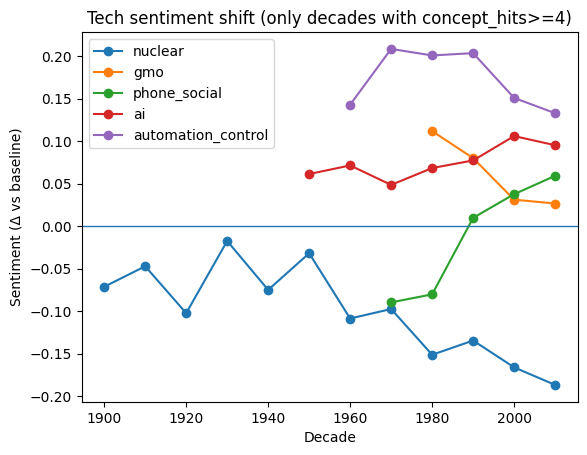

In [31]:
import matplotlib.pyplot as plt

concepts = ["nuclear", "gmo", "phone_social", "ai","automation_control"]
sub = df[df["concept"].isin(concepts)].copy()

plt.figure()
for c in concepts:
    tmp = sub[(sub["concept"]==c) & (sub["concept_hits"]>=4)].sort_values("decade")
    plt.plot(tmp["decade"], tmp["sentiment_delta"], marker="o", label=c)

plt.axhline(0, linewidth=1)
plt.xlabel("Decade")
plt.ylabel("Sentiment (Δ vs baseline)")
plt.title("Tech sentiment shift (only decades with concept_hits>=4)")
plt.legend()
plt.show()